In [ ]:
!conda install -y line_profiler

In [1]:
import numpy
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import copy

In [2]:
%load_ext line_profiler

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
dict = unpickle('dataset/data_batch_1')
print(list(dict.keys()))
print(dict[b'batch_label'])
print(dict[b'filenames'].__len__())

print(dict[b'data'][0])
print(dict[b'labels'][0])
print(dict[b'data'][0].shape)
#print(dict[b'data'][0].resahpe(32, 32))


[b'batch_label', b'labels', b'data', b'filenames']
b'training batch 1 of 5'
10000
[ 59  43  50 ... 140  84  72]
6
(3072,)


shape:  (32, 32, 3)
label:  9


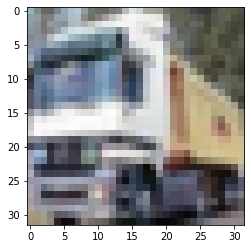

In [5]:

def cifar10_plot(data, img_index=1):
    im = data[b'data'][img_index, :]

    im_r = im[0:1024].reshape(32, 32)
    im_g = im[1024:2048].reshape(32, 32)
    im_b = im[2048:].reshape(32, 32)

    # this is the funciton I was looking for the whole time...
    img = np.dstack((im_r, im_g, im_b))

    print("shape: ", img.shape)
    print("label: ", data[b'labels'][img_index])
    
    #print("category:", meta[b'label_names'][data[b'labels'][im_idx]])         

    plt.imshow(img)
    plt.show()


cifar10_plot(dict)

# Assignment #1 

train set: data_batch_1

validation set: data_batch_2

test set: test_batch

In [78]:

def unpickle(file, n=10000):
    """
    Parameters: 
    file (str): file address 
    num (int): number of datapoints in the file
    """
    import pickle
    import copy 

    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    
    # let's make the Y (which is a K*n matrix of the one-hot representations of the label of each image)
    Y = np.zeros((10, n))
    zero_list = [0 for i in range(10)]
    i = 0
    for a in dict[b'labels']:
        '''
        right = str(bin(a+1)).split('b')[1]
        one_hot = np.array(list('0'*(10-len(right))+right))
        '''
        one_hot = copy.deepcopy(zero_list)
        one_hot[int(a)] = 1
        Y[:, i] = one_hot
        i += 1
        
        

    return dict[b'data'].T, Y, np.array(dict[b'labels'])

train_X, train_Y, train_y = unpickle('dataset/data_batch_1')


In [79]:
def normalize(data_):
    """
    This is used to normalize the data w.r.t mean and std: (x - mean) / std
    """
    data = np.copy(data_)
    data = data.astype(numpy.float32)
    shape = data.shape
    mean = np.mean(data, 1)
    std = np.std(data, 1)


    for i in range(data.shape[1]):
        data[:, i] = (data[:, i] - mean) / std

    return data
    
n_train_X = normalize(train_X)

In [80]:
train_X.shape

(3072, 10000)

In [81]:
n_train_X.shape

(3072, 10000)

In [82]:
print(train_X[0, 0])

59


In [83]:
print(n_train_X[100, 4])

-0.89175713


In [84]:
print(n_train_X[0, 0])

-0.99022263


In [85]:
print(train_X[0, 0])

59


In [86]:
print(np.mean(train_X, 1)[1])
print(np.std(train_X, 1)[1])

131.3316
72.79520891816986


In [87]:
print(n_train_X[0, 0])

-0.99022263


In [88]:
train_X

array([[ 59, 154, 255, ...,  71, 250,  62],
       [ 43, 126, 253, ...,  60, 254,  61],
       [ 50, 105, 253, ...,  74, 211,  60],
       ...,
       [140, 139,  83, ...,  68, 215, 130],
       [ 84, 142,  83, ...,  69, 255, 130],
       [ 72, 144,  84, ...,  68, 254, 131]], dtype=uint8)

In [89]:
class MiniBatchGDNN:
    
    def __init__(self, k, d):
        # k is the number of classes
        # d is the data dimention
        self.k = k
        self.d = d

        # initializing the weight matrix
        self.W = np.random.normal(0, 0.01, (k, d))
        self.b = np.random.normal(0, 0.01, (k, 1))

    
    def evaluate_classifier(self, X, W, b):
        # Each column in X corresponds to 'one' image in this context having the d*n size
        # This function returns: k*n, each row contains probability for the specific class

        if len(X.shape) >= 2:
            second_dimention = X.shape[1]
            temp_b = np.array(b * second_dimention)
            result = np.dot(W, X) + temp_b
        else:
            second_dimention = 0
            temp_b = b
            result = np.dot(W, X).reshape(10, 1) + temp_b
        
        

        P = np.zeros(result.shape).shape
        
        if second_dimention:
            P = np.zeros(result.shape)
            for j in range(second_dimention):
                P[:, j] = np.exp(result[:, j]) / sum(np.exp(result[:, j]))
        else:
            P = np.zeros((result.shape[0], 1))
            P = (np.exp(result) / sum(np.exp(result))).reshape((self.k, 1))
            # just one row of elements in P
        
        return P
    

    def compute_cost(self, X, Y, W, b, lambda_):
        n = X.shape[1]
        r = np.sum(np.square(self.W))
        P = self.evaluate_classifier(X, W, b)
        l = 0
        for i in range(n):
            y = Y[:, i]
            p = P[:, i]
            probability = np.dot(y, p)
            
            if probability == 1:
                print('!!!!!!!!!!!!!!!!!!!+++++++++++++!!!!!!!!!!!!!!!!!!!!')
                print('probability==1 detected...')
                print('y: \n{0}\np:\n{1}'.format(y, p))

            if probability == 0:
                
                print('!!!!!!!!!!!!!!!!!!!_______!!!!!!!!!!!!!!!!!!!!')
                print('probability=0 detected, this is a bad omen...')
                print('y is {0}\n p is: {1}'.format(y, p))
                print('!!!!!!!!!!!!!!!!!!!_______!!!!!!!!!!!!!!!!!!!!')
                
                probability = 1.00e-100


            

            l = - np.log(probability)
            

            if not l:
                print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
                print('probablity: {}'.format(probability))
                print('l: {}'.format(l))
                print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
            
            assert not np.isinf(l)
            
        J = (l / n) + (lambda_ * r)
        
        return J
    
    def accuracy(self, X, y, W, b):
        # y is a vector containing the ground truth label numbers (just like train_y)
        P = self.evaluate_classifier(X, W, b)
        prediction = np.argmax(P, axis=0)
        n = X.shape[1]
        incorrect = 0
        for i in range(n):
            if y[i] != prediction[i]:
                incorrect += 1
        return (n - incorrect) / n
    

    def compute_grads_num_slow(self, X, Y, P, W, b, lamda_, h=0.01):
        

        no 	= 	W.shape[0]
        d 	= 	X.shape[0]

        grad_W = np.zeros(W.shape)
        grad_b = np.zeros((no, 1))


        
        for i in range(len(b)):
            b_try = np.array(b)
            b_try[i] -= h
            c1 = self.compute_cost(X, Y, W, b_try, lamda_)

            b_try = np.array(b)
            b_try[i] += h
            c2 = self.compute_cost(X, Y, W, b_try, lamda_)

            grad_b[i] = (c2-c1) / (2*h)
        

        for i in range(W.shape[0]):
            print('>> inside grad computation main loop, i: {}'.format(i))
            for j in range(W.shape[1]):

                W_try = np.array(W)
                W_try[i,j] -= h
                c1 = self.compute_cost(X, Y, W_try, b, lamda_)

                W_try = np.array(W)
                W_try[i,j] += h
                c2 = self.compute_cost(X, Y, W_try, b, lamda_)

                grad_W[i,j] = (c2-c1) / (2*h)

                
                if np.isnan(grad_W[i,j]):
                    print('You are in a bad situation...')
                    print(2*h)
                    print(c1)
                    print(c2)
                    print('X: \n {}'.format(X))
                    print('Y: \n {}'.format(Y))
                    print('Is W_try nan: {0}\nW_try: \n {1}'.format(np.isnan(np.sum(W_try)), W_try))
                    print('Is b nan: {0}\nb: \n {1}'.format(np.isnan(np.sum(b)), b))
                    print('lambda: {}'.format(lamda_))
                    print('#####################')
                
                

        if np.isnan(np.sum(grad_W)):
            print('\n.   ^^^^^^^^^^^^^^^^^^^^ smt bad: ')
        
        assert not np.isnan(np.sum(grad_W))

        return [grad_W, grad_b]



    def train(self, X, Y, eta=0.01, lambda_=0, epochs=100, mini_batch_size=100):
        # forward pass
        # backward pass
        # update weight matrix
        
        # let's do a permutation of the total dataset size!
        n = X.shape[1]
        d = X.shape[0]
        assert n % mini_batch_size == 0

        stacked_arrays = np.concatenate((X, Y))
        '''
        W = copy.deepcopy(self.W)
        temp_ar = np.zeros((self.k, n-d))
        temp_ar2 = np.concatenate((W, temp_ar),  axis=1)
        stacked_arrays = np.concatenate((stacked_arrays, temp_ar2))
        '''
        
        np.take(stacked_arrays, np.random.permutation(n), axis=1, out=stacked_arrays)
        
        X_, Y_ = np.split(stacked_arrays, [self.d], axis=0)
        
        '''
        Y_, W = np.split(Y_W, [self.k], axis=0)
        W = copy.deepcopy(W[:, 0:self.d])
        '''
        

        for i in range(epochs):
            '''
            # if we use train_y as well:
            temp1 = np.concatenate((train_X, train_Y))
            temp2 = train_y.reshape((train_y.shape[0], 1)).T
            stacked_arrays = np.concatenate((temp1, temp2)).shape
            '''
            

            # remember that you need to stack the newly changed W matrix on this not the old one!!!

            

            num_of_batches = int(n / mini_batch_size)
            l_index = 0
            h_index = 0
            for i in range(num_of_batches):
                l_index = h_index
                h_index = (i+1) * mini_batch_size
                batch_X = X_[:, l_index:h_index]
                batch_Y = Y_[:, l_index:h_index]
                P = self.evaluate_classifier(batch_X, self.W, self.b)

                grad_W, grad_b = self.compute_grads_num_slow(batch_X, batch_Y, P, self.W, self.b, lambda_)
                
                print('******** grads computed, batch number: {}'.format(i))
                
                # TODO: remove this:
                '''
                print('shape of W: {}'.format(self.W.shape))
                print('shape of grad_W: {}'.format(grad_W.shape))
                print('shape of b: {}'.format(self.b.shape))
                print('shape of grad_b: {}'.format(grad_b.shape))
                print('this is grad_W:')
                print(grad_W)
                print('dtype of grad_W: {0}, dtype of W: {1}'.format(self.W.dtype, grad_W.dtype))
                print('eta is: {}'.format(eta))
                print('result of operation (temp): ')
                print(self.W - (eta * grad_W))
                '''

                print('dimentions of grad_W: {}'.format(grad_W.shape))

                self.W = self.W - (eta * grad_W)
                self.b = self.b - (eta * grad_b)

                # TODO: remove this
                print('------------------------')
            

            
            stacked_arrays = np.concatenate((X_, Y_))
            '''
            temp_ar2 = np.concatenate((W, temp_ar),  axis=1)
            stacked_arrays = np.concatenate((stacked_arrays, temp_ar2))
            '''
            
            np.take(stacked_arrays, np.random.permutation(n), axis=1, out=stacked_arrays)
            
            X_, Y_ = np.split(stacked_arrays, [self.d], axis=0)
            '''
            Y_, W = np.split(Y_W, [self.k], axis=0)
            W = copy.deepcopy(W[:, 0:self.d])
            '''
            
            # TODO: remove this
            print('epoch ended...')

        
        # When all of epochs end, we have to replace the self.W with the heavily updated W!
        

        



In [90]:
ar1 = np.array([[1, 2], [11, 12]])
ar2 = np.array([[3, 4, 5], [1, 2, 3]])
print(ar1.shape)
print(ar2.shape)
np.concatenate((ar1, ar2), axis=1)

(2, 2)
(2, 3)


array([[ 1,  2,  3,  4,  5],
       [11, 12,  1,  2,  3]])

In [99]:
nn = MiniBatchGDNN(k=10, d=3072)
#res = nn.evaluate_classifier(train_X[:, 0], nn.W, nn.b)
#nn.compute_cost(n_train_X, train_Y, nn.W, nn.b, 0.01)
#nn.accuracy(n_train_X, train_y, nn.W, nn.b)

In [100]:
%lprun -f nn.train nn.train(n_train_X[0:3072, :], train_Y, eta=0.01, epochs=10)
#%lprun -f nn.train nn.train(n_train_X, train_Y, eta=0.01, epochs=20)

>> inside grad computation main loop, i: 0
*** KeyboardInterrupt exception caught in code being profiled.

Timer unit: 1e-06 s

Total time: 7.21623 s
File: <ipython-input-89-38c923c97c54>
Function: train at line 158

Line #      Hits         Time  Per Hit   % Time  Line Contents
   158                                               def train(self, X, Y, eta=0.01, lambda_=0, epochs=100, mini_batch_size=100):
   159                                                   # forward pass
   160                                                   # backward pass
   161                                                   # update weight matrix
   162                                                   
   163                                                   # let's do a permutation of the total dataset size!
   164         1          4.0      4.0      0.0          n = X.shape[1]
   165         1          1.0      1.0      0.0          d = X.shape[0]
   166         1          1.0      1.0      0.0          assert n % mini_batch_size == 0
   167                                           
   168         1     3

In [98]:
nn.accuracy(n_train_X[0:5, :], train_y, nn.W, nn.b)

0.1005

In [24]:
print(nn.W.shape)

(10, 5)


In [23]:
print(nn.W.shape)
print(n_train_X[0:5, :].shape)
print(train_Y.shape)

(10, 5)
(5, 10000)
(10, 10000)


In [ ]:
J = nn.compute_cost(n_train_X, train_Y, nn.W, nn.b, 0.01)

In [857]:
res = nn.evaluate_classifier(n_train_X[0:5, :], nn.W, nn.b)f

In [859]:
nn.accuracy(n_train_X[0:5, :], train_y, nn.W, nn.b)

0.0974

In [36]:
print('shape of train_X: {}'.format(train_X.shape))
print(train_X[0:50, 1])
print('shape of n_train_X: {}'.format(train_X.shape))
print(n_train_X[0:50, 1])

shape of train_X: (3072, 10000)
[154 126 105 102 125 155 172 180 142 111 106 109 123 127 181 217 209 166
 164 158 116 102  95  90  72  60  56  77  94  91  87  79 140 145 125 124
 150 152 174 178 134 110 133 163 192 218 240 245 241 238]
shape of n_train_X: (3072, 10000)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   1   0
   0   0   0   0   0   0   0 255 255   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   1   1   1   1   1]


In [75]:
mean = np.mean(train_X, 1)
std = np.std(train_X, 1)
print(mean[0:50])
print(std[0:50])


[132.0083 131.3316 132.1932 132.8545 133.5792 134.3971 134.7978 135.1851
 135.8141 136.297  136.8169 137.113  137.3297 137.1162 136.8877 136.9053
 137.1568 137.2577 137.2893 137.2488 136.9061 136.7277 136.4994 136.2089
 135.7952 135.3322 134.872  134.1757 133.4242 132.8146 132.0122 131.9019
 131.3094 130.401  131.3778 131.7695 132.2499 132.9564 133.2472 133.5744
 134.1906 134.9024 135.5159 135.8525 136.1054 135.9043 135.6061 135.7247
 135.9062 136.0032]
[73.72932002 72.79520892 72.49635904 72.19688726 72.1032782  71.88391901
 71.58008323 71.44139443 71.12615511 71.19297712 70.97483339 70.84230538
 70.8606929  70.76832694 70.68004449 70.64497669 70.67071822 70.71601014
 70.66743667 70.84215622 71.02103972 71.24657152 71.18513609 71.1998038
 71.24973022 71.33803784 71.5401343  71.84855064 72.33407395 72.46220551
 72.91341887 73.23642998 73.15373997 72.2499301  71.87634567 71.49677034
 71.32137583 70.93864884 70.55254561 70.4199039  70.13925486 69.91123282
 69.60276681 69.55933973 69.5088

In [76]:
n_train_X[0:50, 1]

array([ 0.29827675, -0.07324158, -0.3750974 , -0.42736548, -0.11898452,
        0.28661346,  0.5197285 ,  0.6272956 ,  0.08697087, -0.3553301 ,
       -0.43419436, -0.39683917, -0.20222324, -0.14294833,  0.62411153,
        1.1337601 ,  1.01659   ,  0.40644646,  0.3779774 ,  0.29292175,
       -0.29436454, -0.4874307 , -0.5829697 , -0.6490021 , -0.89537627,
       -1.0559981 , -1.1024871 , -0.7957794 , -0.54502976, -0.5770546 ,
       -0.6173357 , -0.7223444 ,  0.11879887,  0.2020635 , -0.08873308,
       -0.10866959,  0.24887115,  0.2684516 ,  0.57762367,  0.63086724,
       -0.00271741, -0.35620022, -0.03614654,  0.39027867,  0.80413663,
        1.1824437 ,  1.5043609 ,  1.577017  ,  1.5185467 ,  1.4727528 ],
      dtype=float32)

In [77]:
b = np.copy(train_X)
b = b.astype(numpy.float32)

[[ 59. 154. 255. ...  71. 250.  62.]
 [ 43. 126. 253. ...  60. 254.  61.]
 [ 50. 105. 253. ...  74. 211.  60.]
 ...
 [140. 139.  83. ...  68. 215. 130.]
 [ 84. 142.  83. ...  69. 255. 130.]
 [ 72. 144.  84. ...  68. 254. 131.]]
